In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def compare_phylo_cv_results(ds,encoding_method,pre_gs_results_df,post_gs_results_df,atts_of_intrst,relation_handeling_methods=None,models_to_keep=None,max_threshold=100, suffix='gs'):
    
    if models_to_keep != None:
        post_gs_results_df = post_gs_results_df[post_gs_results_df['Model'].isin(models_to_keep)]
    else:
        models_to_keep = post_gs_results_df['Model'].unique()
    
    if isinstance(suffix,list):
        suffix1 = suffix[0]
        suffix2 = suffix[1]
        post_gs_results_df_copy = post_gs_results_df.copy()
        post_gs_results_df_copy['Model'] = post_gs_results_df_copy['Model'] + '_' + suffix2
    else:
        post_gs_results_df_copy = post_gs_results_df.copy()
        post_gs_results_df_copy['Model'] = post_gs_results_df_copy['Model'] + '_' + suffix
    
    for attr in atts_of_intrst:
        
        # Group by `Relation_Handling` and `Model`, calculate the mean of `R2`, and reset the index
        model_att = pre_gs_results_df[pre_gs_results_df['Model'].isin(models_to_keep)]
        if isinstance(suffix,list):
            model_att['Model'] = model_att['Model'] + '_' + suffix1
        model_att = pd.concat([model_att,post_gs_results_df_copy],ignore_index=True)
        model_att = model_att[model_att['Threshold']<=max_threshold]
        # Get unique relation handling methods
        if relation_handeling_methods == None:
            relation_handeling_methods = model_att['Relation_Handling'].unique()

        for method in relation_handeling_methods:
            # Filter for 'leave_out' method and drop NaN values
            method_df = model_att[model_att['Relation_Handling'] == method].dropna(subset=attr)
            #method_df = method_df[method_df['Model'] != 'lr']
            if len(models_to_keep) > 1:
                # Create the plot using Seaborn
                plt.figure(figsize=(16, 8))  # Increase width for better clarity
                sns.lineplot(data=method_df, x='Threshold', y=attr, hue='Model')

                # Add labels and title with larger font size
                plt.xlabel(f'Percentile Threshold\n(Using "{method}" Threshold Handling)', fontsize=20)
                plt.ylabel(attr, fontsize=20)
                plt.xticks(fontsize=20)
                plt.yticks(fontsize=20)

                # Place the legend in the bottom left corner
                plt.legend(loc='lower left', fontsize=16)

                # Show the plot
                plt.tight_layout()
                
                if isinstance(suffix,list):
                    plt.savefig(f'./{ds}_{encoding_method}_{suffix1}_v_{suffix2}_all_models_comparison_{attr}_{method}_handeling_performance_trend.svg', format='svg')  # You can change the filename if needed

                else:
                    # Save the figure as an SVG file
                    plt.savefig(f'./{ds}_{encoding_method}_{suffix}_comparison_{attr}_{method}_handeling_performance_trend.svg', format='svg')  # You can change the filename if needed

                plt.show()
            
            for model_type in models_to_keep:
                if isinstance(suffix,list):
                    temp_list = [f'{model_type}_{suffix1}',f'{model_type}_{suffix2}']
                else:    
                    temp_list = [model_type,f'{model_type}_{suffix}']
                model_df = method_df[method_df['Model'].isin(temp_list)]

                # Create the plot using Seaborn
                plt.figure(figsize=(16, 8))  # Increase width for better clarity
                sns.lineplot(data=model_df, x='Threshold', y=attr, hue='Model')

                # Add labels and title with larger font size
                plt.xlabel(f'Percentile Threshold\n(Using "{method}" Threshold Handling)', fontsize=20)
                plt.ylabel(attr, fontsize=20)
                plt.xticks(fontsize=20)
                plt.yticks(fontsize=20)

                # Place the legend in the bottom left corner
                plt.legend(loc='lower left', fontsize=16)

                # Show the plot
                plt.tight_layout()
                
                if isinstance(suffix,list):
                    plt.savefig(f'./{ds}_{encoding_method}_{suffix1}_v_{suffix2}_{model_type}_comparison_{attr}_{method}_handeling_performance_trend.svg', format='svg')  # You can change the filename if needed
                else:
                    # Save the figure as an SVG file
                    plt.savefig(f'./{ds}_{encoding_method}_{model_type}_{suffix}_comparison_{attr}_{method}_handeling_performance_trend.svg', format='svg')  # You can change the filename if needed

                plt.show()

In [8]:
report_dir = 'e:/safra/Documents/GitHub/visual-physiology-opsin-db/result_files/phylo_weighted_cv'
atts_of_intrst = ['R2', 'MAE']
relation_handeling_methods = ['leave_out']
suffix=['pre_gs','post_gs']

In [4]:
wt_pre_gs_results_df = pd.read_csv(f"{report_dir}/one_hot_encoded/pre_grid_search/wt_vpod_1.2_LG_F_R7_phylo_cv_2024-08-21_18-35-49/wt_vpod_1.2_one_hot_LG_F_R7_phylo_cv_results.csv") # Replace with your actual file name
wt_pre_gs_results_df.head()

Tree Relation_Handling  N_Folds          Model  \
0  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5            gbr   
1  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5            xgb   
2  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5  BayesianRidge   
3  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5             rf   
4  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5           lgbm   

   Threshold        R2        MAE      MAPE         MSE       RMSE  
0          1  0.918240  10.021068  0.021794  269.741766  16.228467  
1          1  0.903778  10.068680  0.021886  326.308734  17.106636  
2          1  0.899020  10.893822  0.024053  342.546888  17.386153  
3          1  0.895095  10.326363  0.022821  347.028600  18.057821  
4          1  0.894059  10.881975  0.023940  353.433643  18.122829

In [5]:
# Load the results file
wt_post_gs_results_df = pd.read_csv(f"{report_dir}/one_hot_encoded/post_grid_search/wt_vpod_1.2_LG_F_R7_phylo_cv_2025-03-19_20-11-06/wt_vpod_1.2_one_hot_gs_LG_F_R7_phylo_cv_results.csv") # Replace with your actual file name
wt_post_gs_results_df.head()

Tree Relation_Handling  N_Folds          Model  \
0  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5            xgb   
1  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5             rf   
2  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5            gbr   
3  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5  BayesianRidge   
4  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5            xgb   

   Threshold        R2        MAE      MAPE         MSE       RMSE  
0          1  0.920571   9.505892  0.020730  262.446629  15.930043  
1          1  0.907626   9.703586  0.021621  313.703619  16.673845  
2          1  0.906931   9.567889  0.021100  315.903779  16.742993  
3          1  0.898950  10.857941  0.023978  342.924768  17.386165  
4          3  0.915282   9.924603  0.021607  275.060584  15.779876

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\4233631076.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


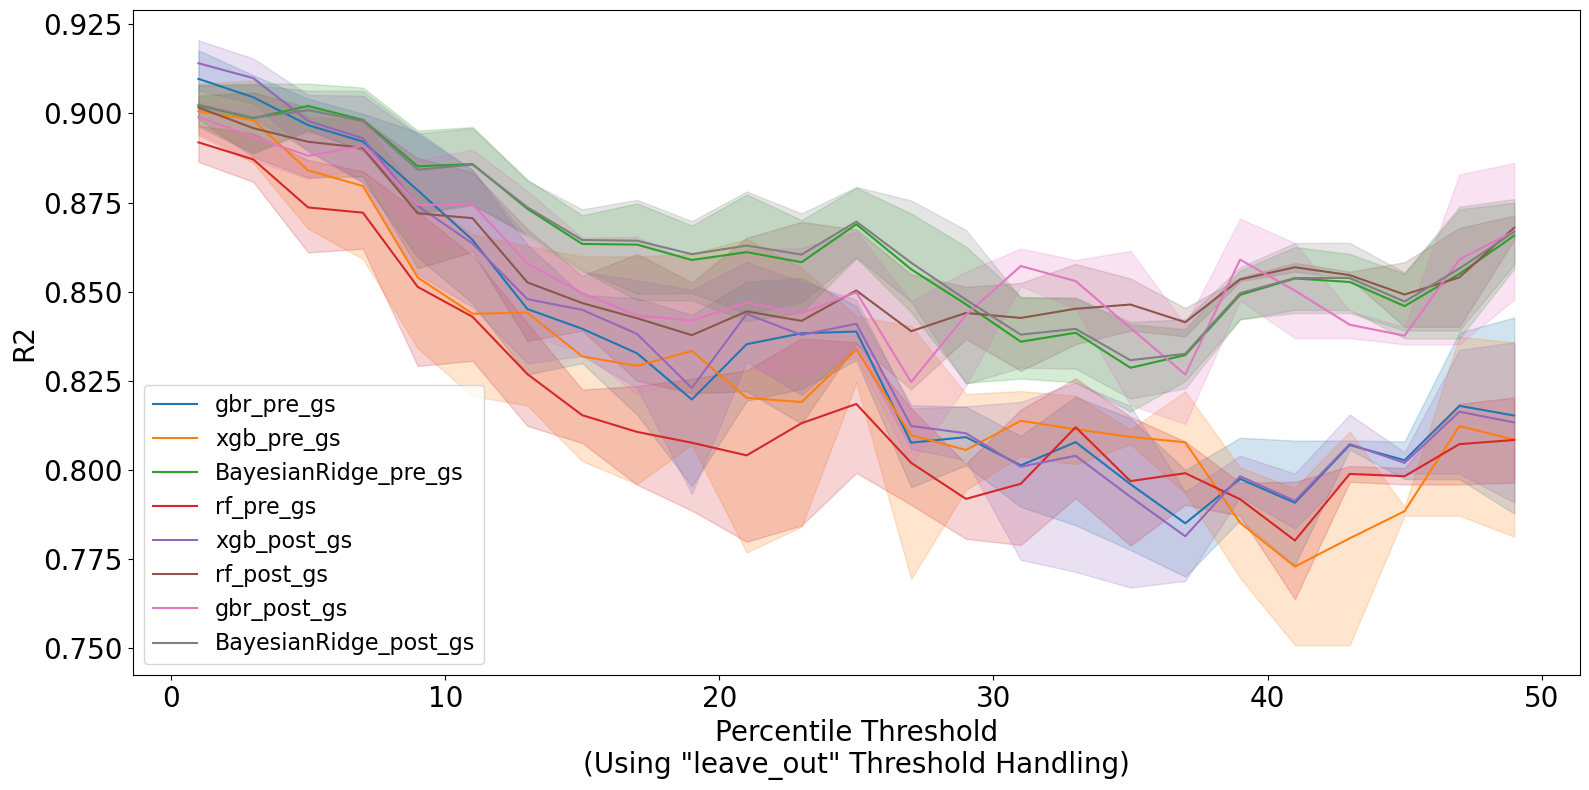

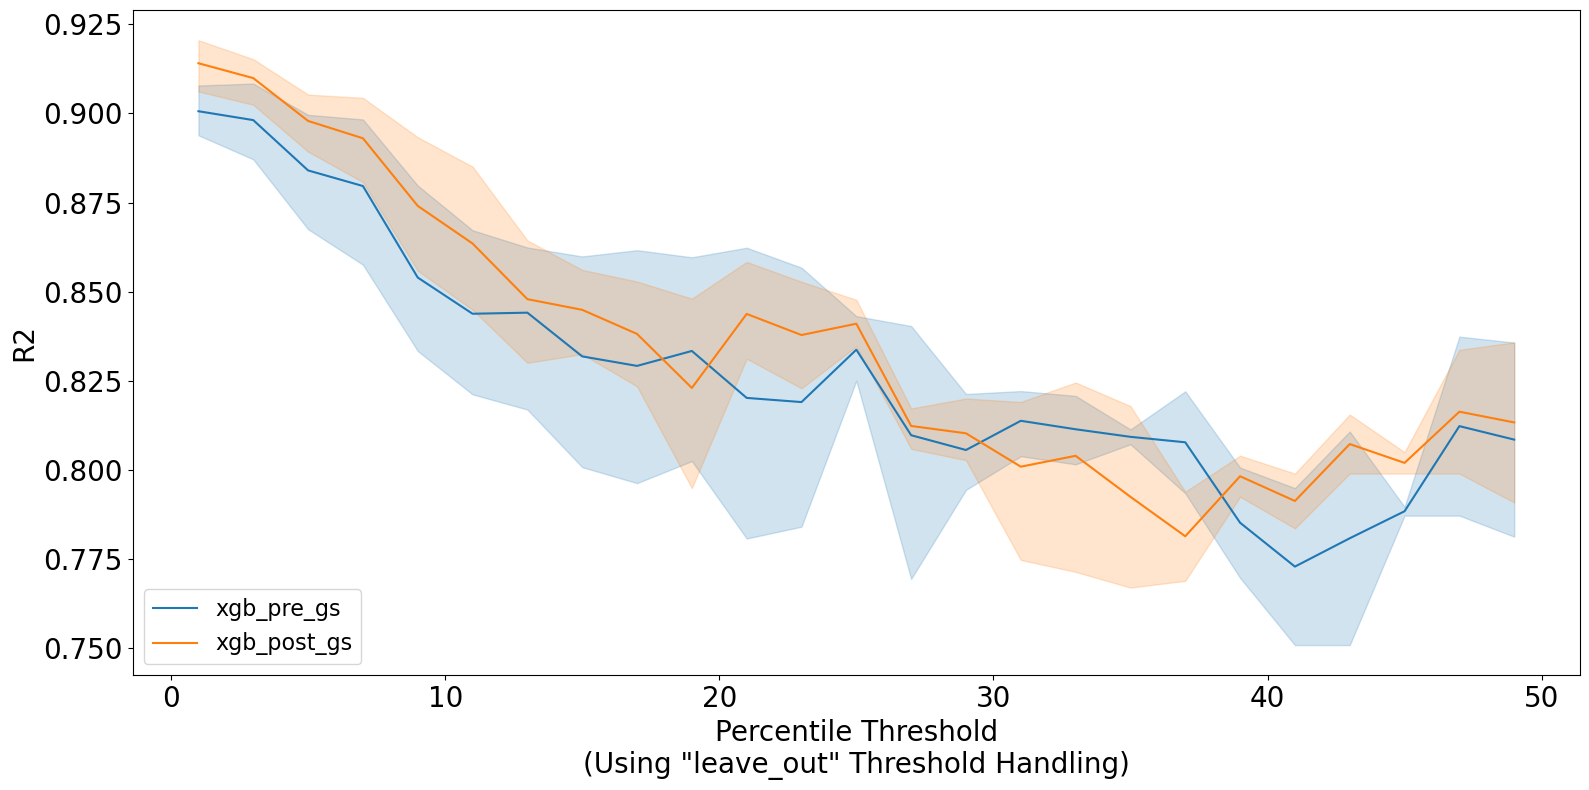

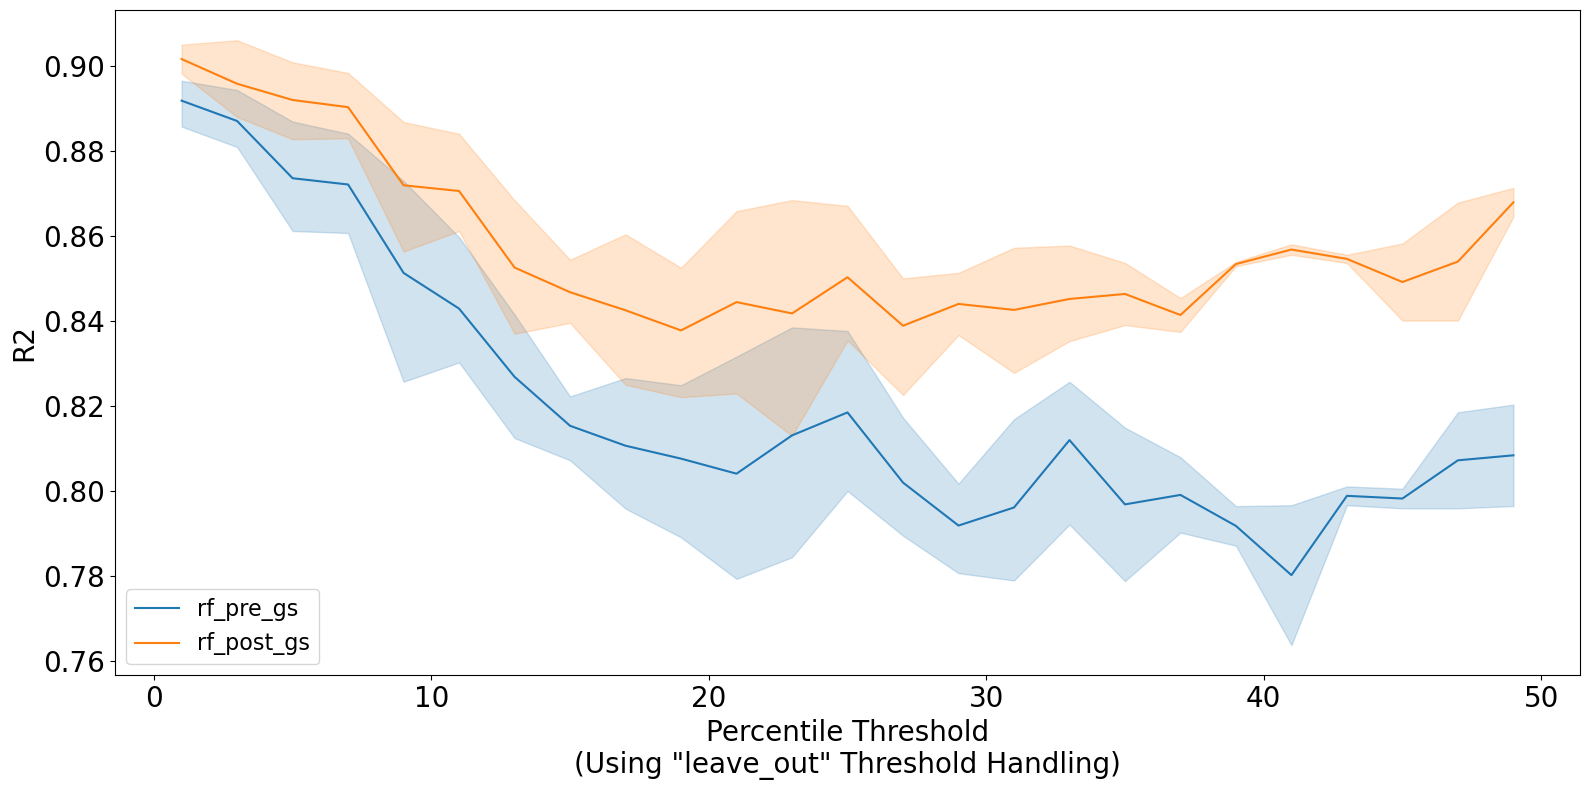

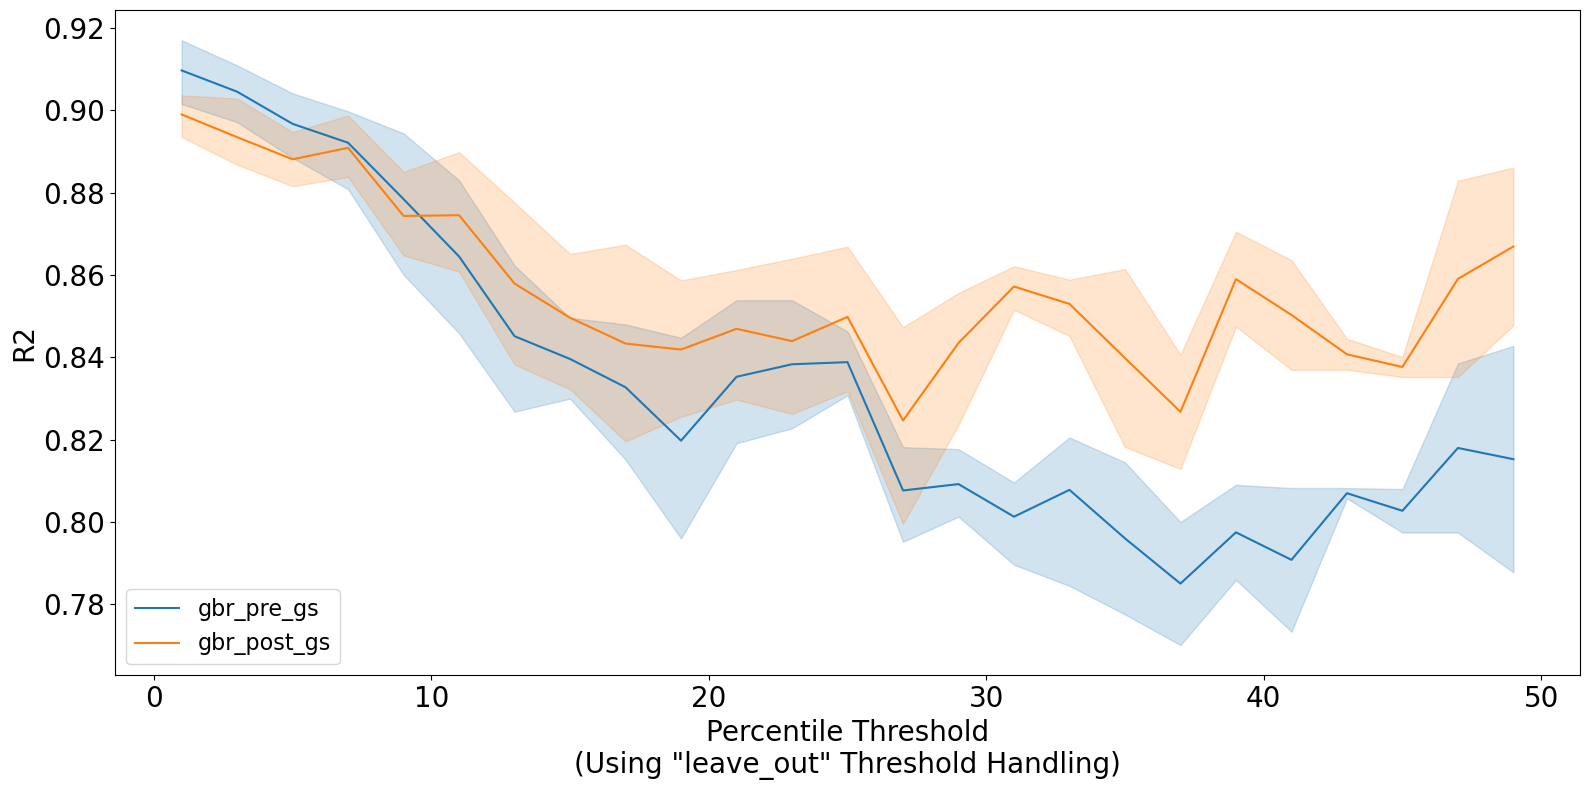

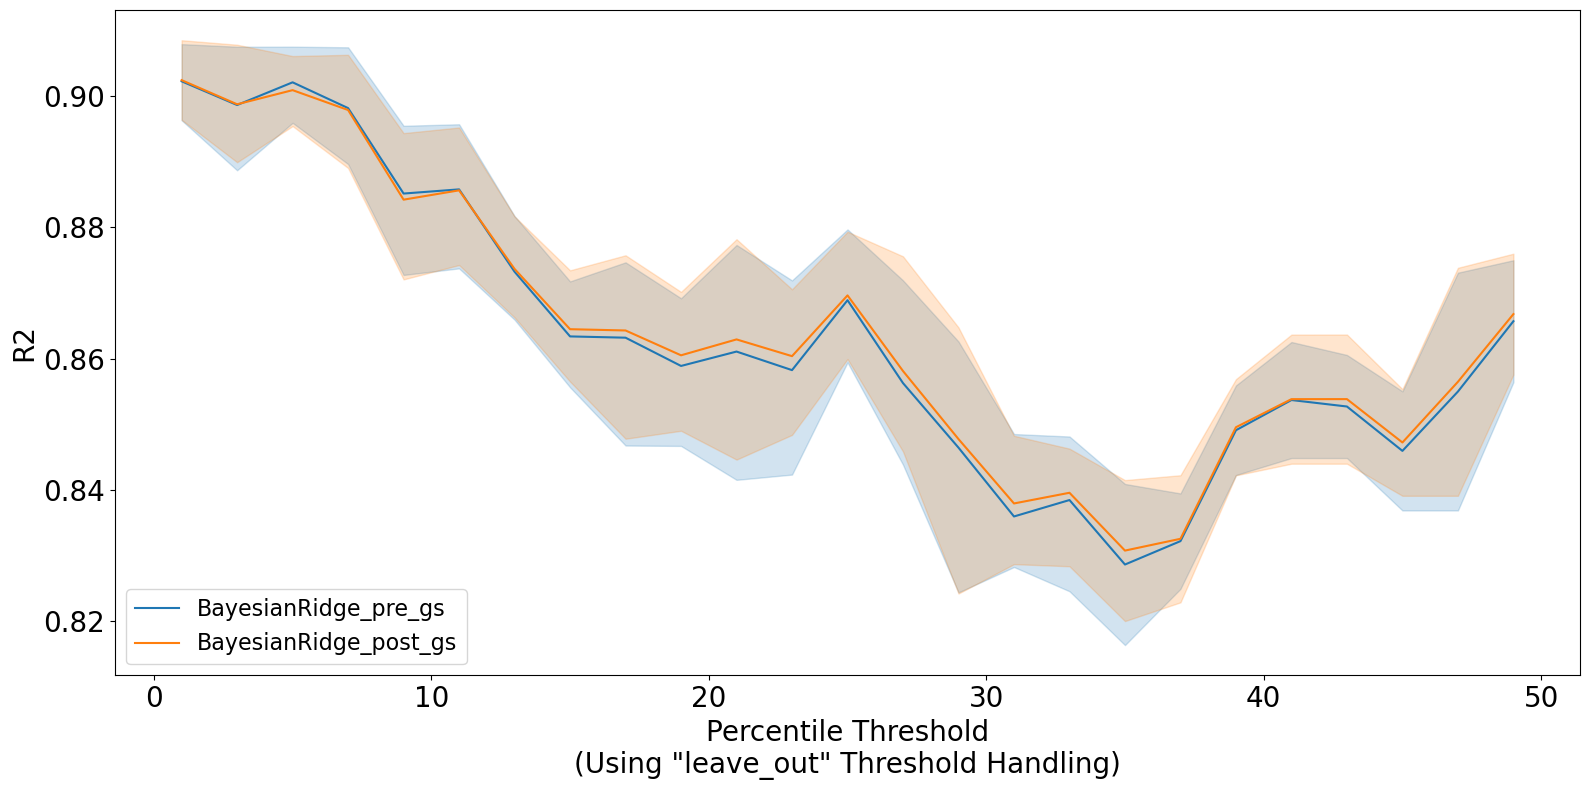

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\4233631076.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


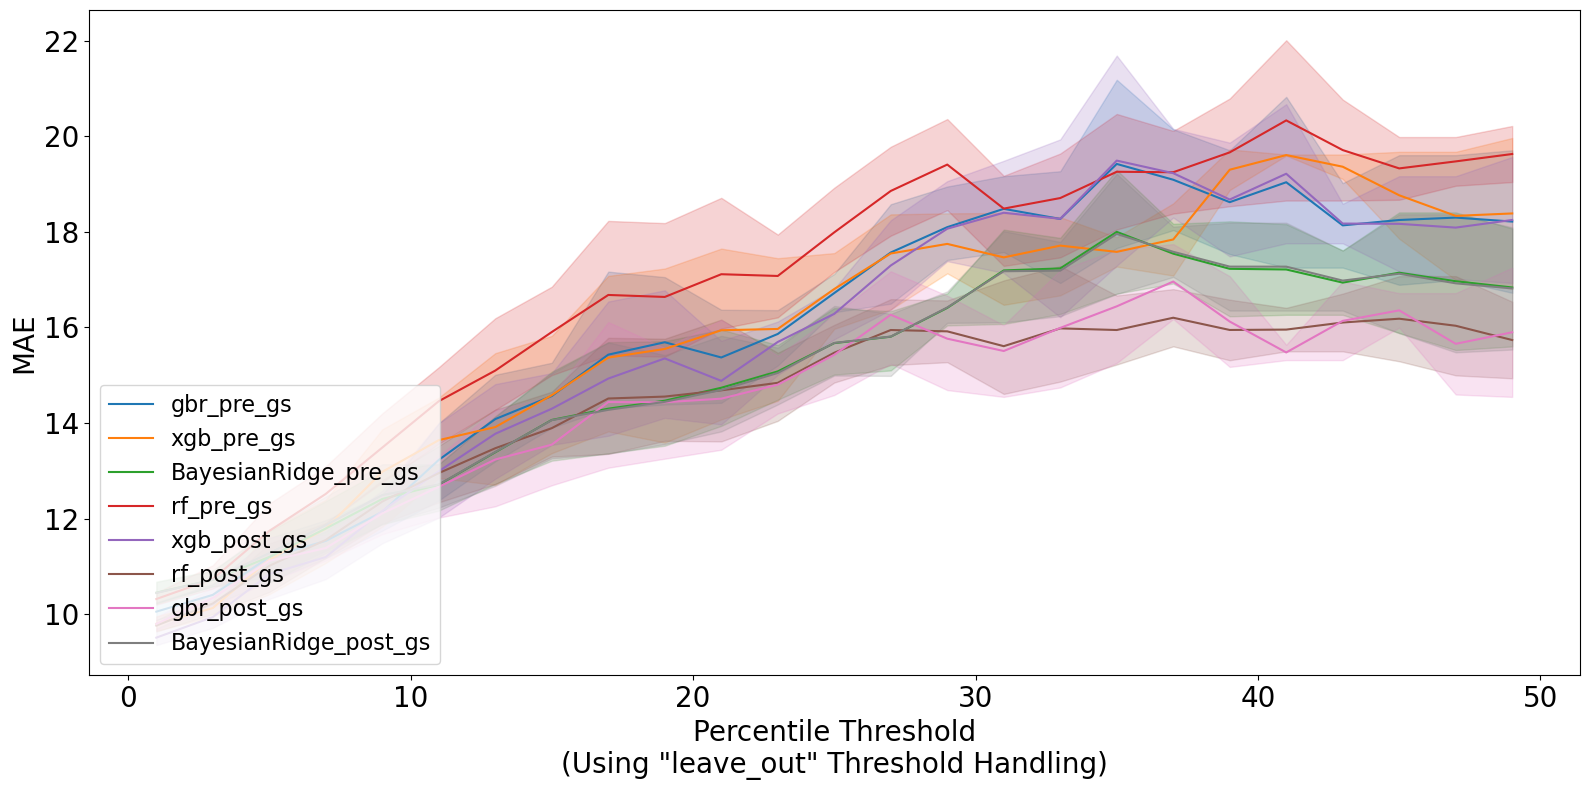

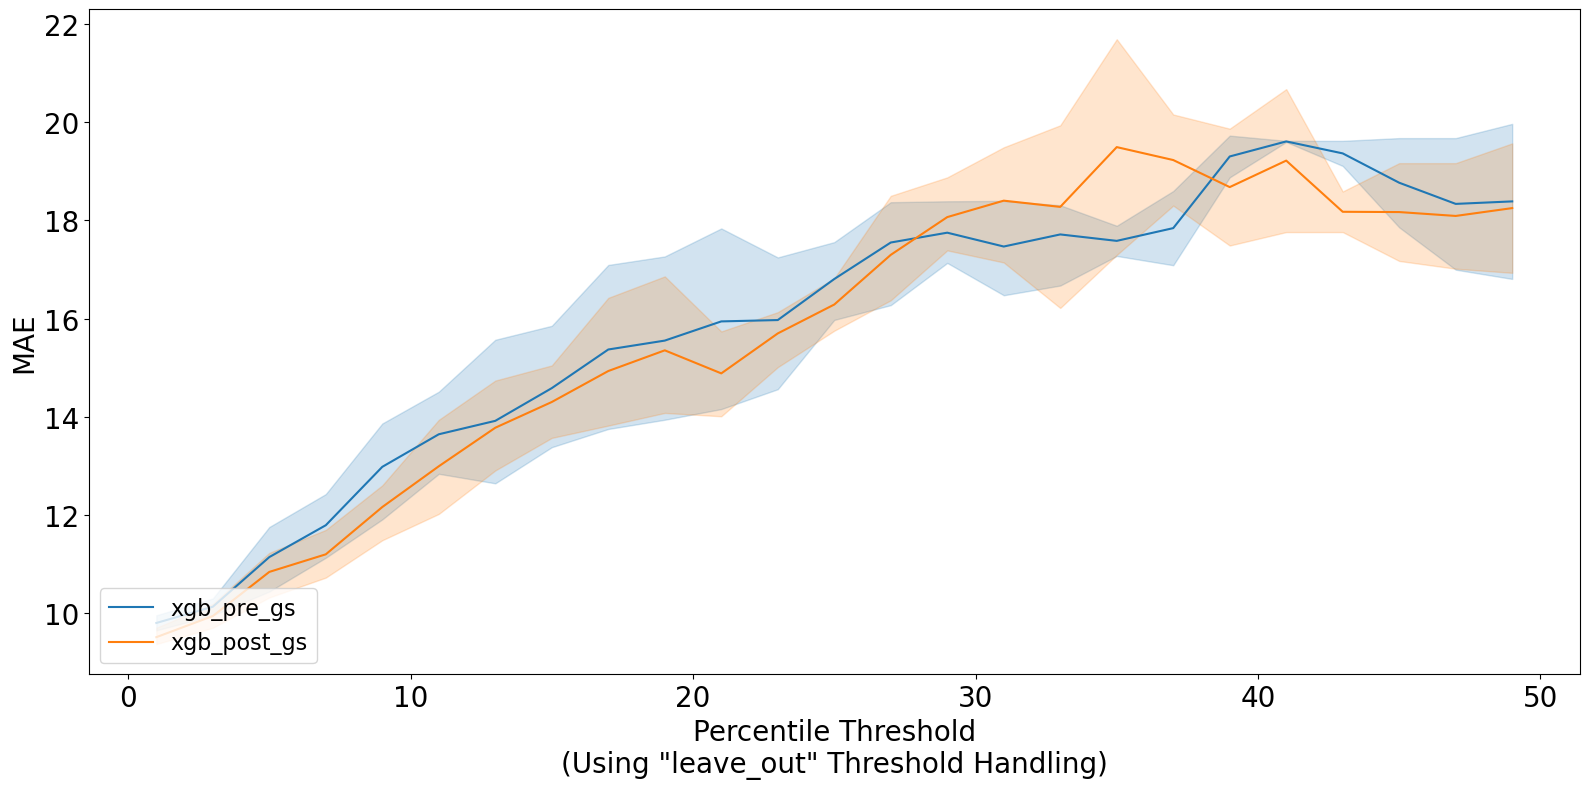

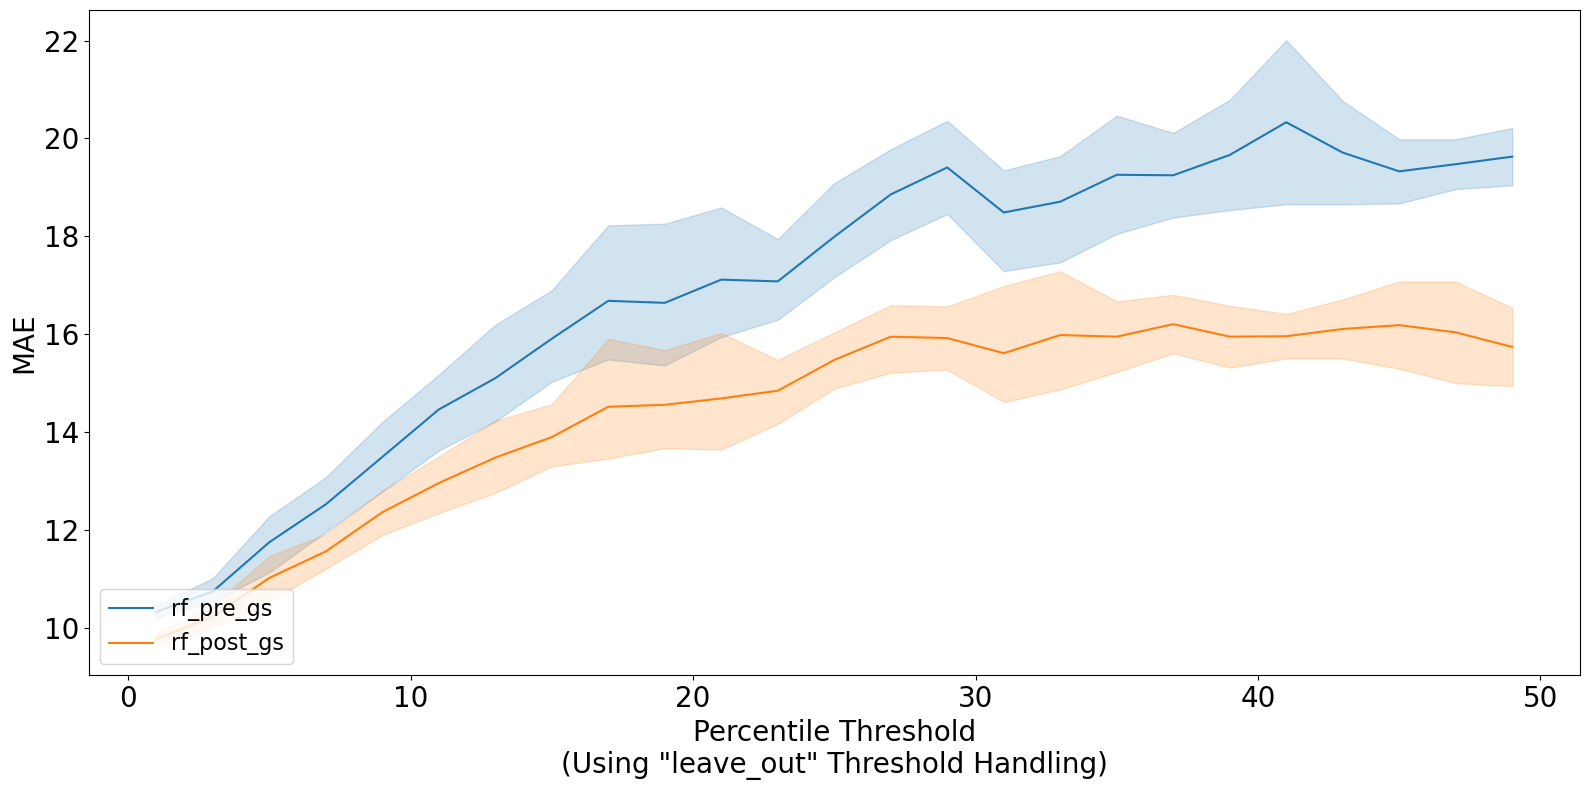

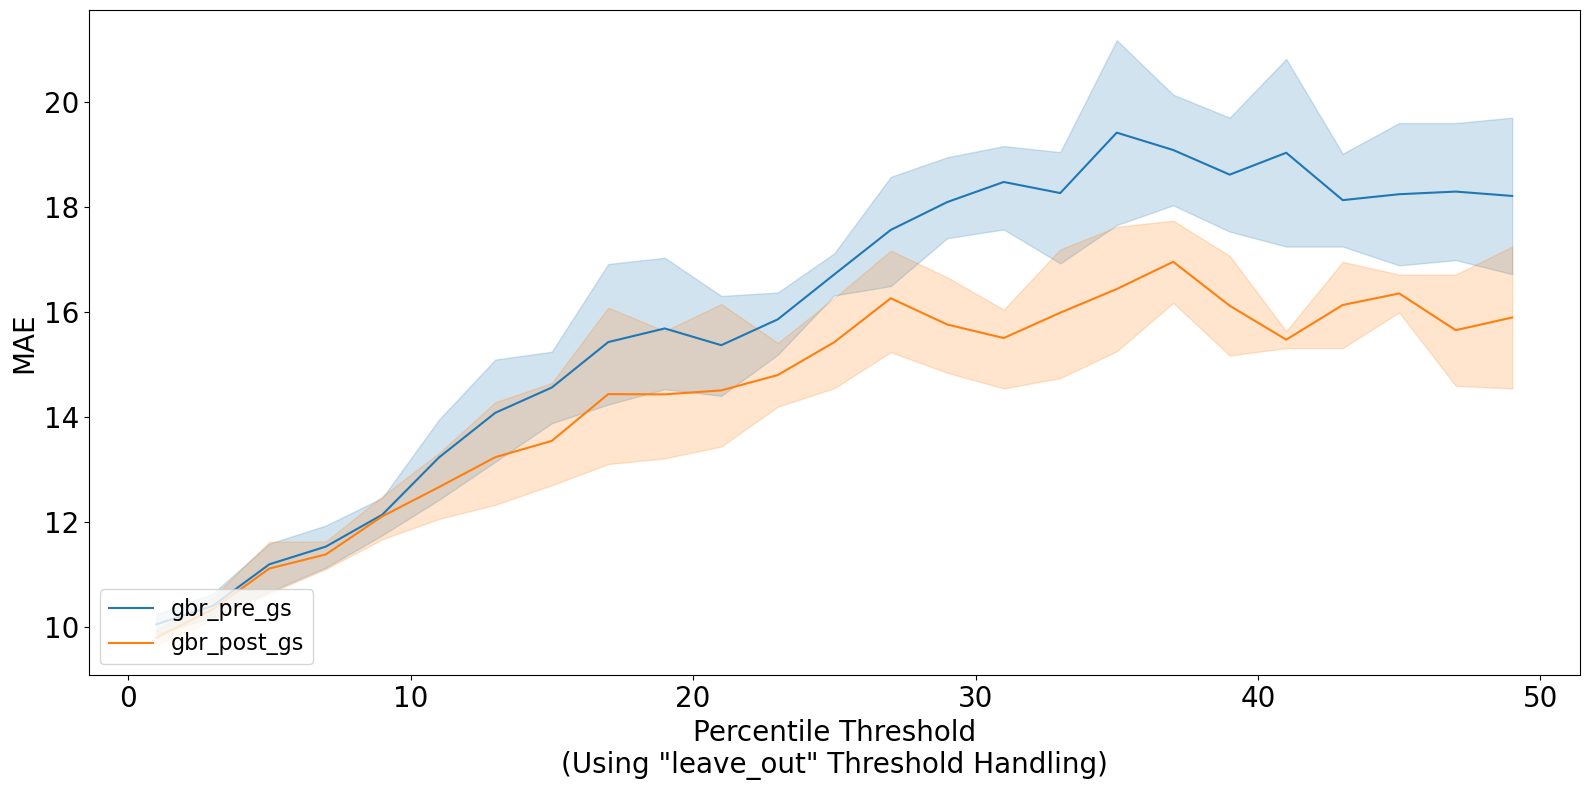

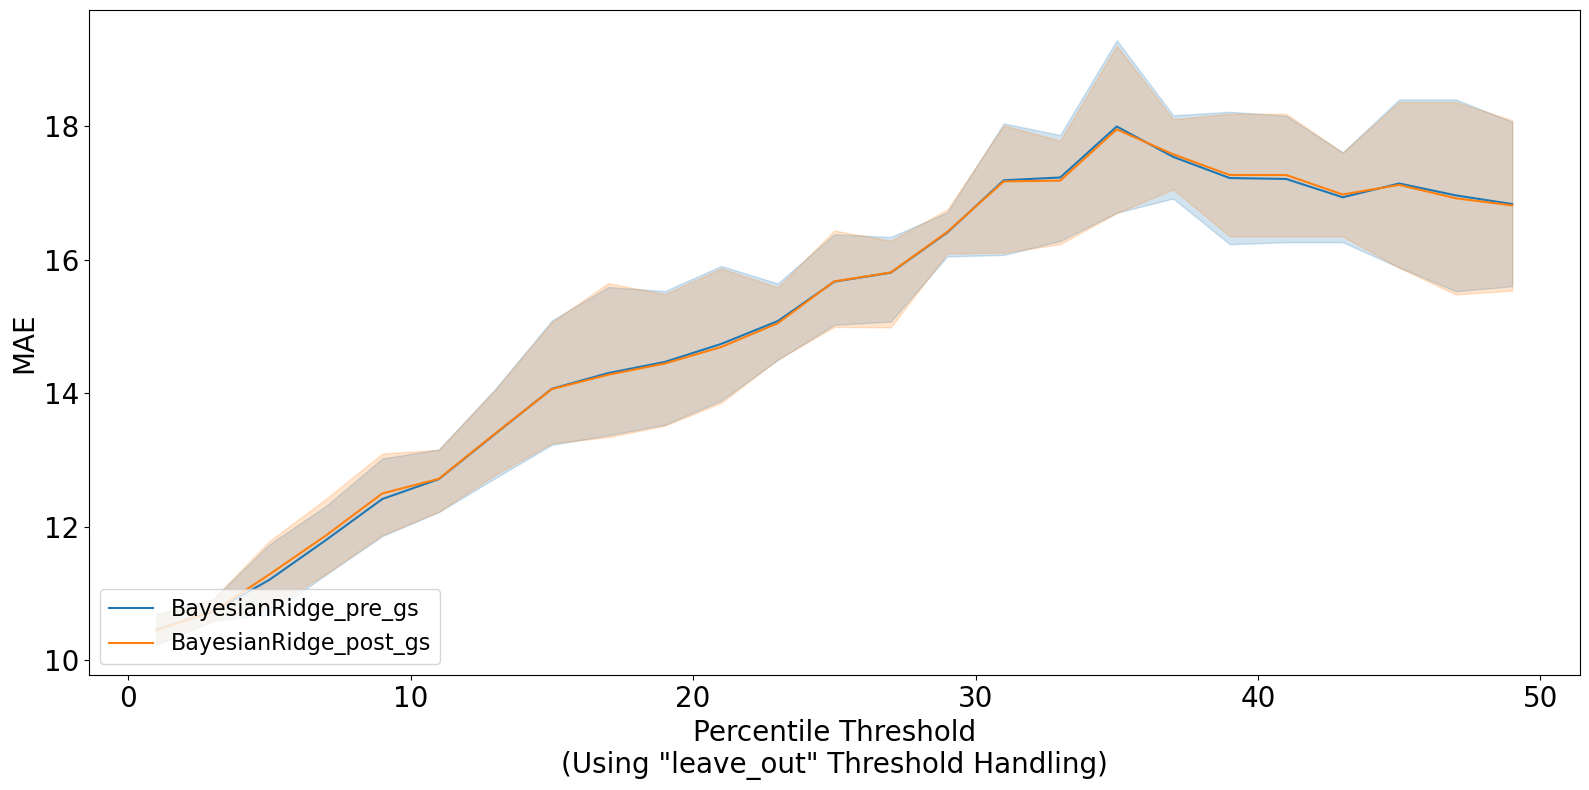

In [9]:
# Load the results file
encoding_method = 'onehot'
compare_phylo_cv_results('wt',encoding_method,wt_pre_gs_results_df,wt_post_gs_results_df,atts_of_intrst, relation_handeling_methods=relation_handeling_methods, max_threshold=50, suffix=suffix)

In [12]:
# Load the results file
wt_aap_pre_gs_results_df = pd.read_csv(f"{report_dir}/aa_prop_encoded/pre_grid_search/wt_vpod_1.2_LG_F_R7_phylo_cv_2025-05-06_13-46-51/wt_vpod_1.2_LG_F_R7_phylo_cv_results.csv") # Replace with your actual file name
wt_aap_pre_gs_results_df.head()

Tree Relation_Handling  N_Folds     Model  \
0  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5        et   
1  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5       xgb   
2  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5  Adaboost   
3  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5      lgbm   
4  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5       gbr   

   Threshold        R2        MAE      MAPE         MSE       RMSE  
0          1  0.892831   9.774592  0.021427  365.098079  18.008017  
1          1  0.887797   9.965724  0.022174  373.835935  18.808389  
2          1  0.886741  12.568078  0.027451  383.654093  18.649519  
3          1  0.884571  10.329160  0.023116  391.390400  18.529036  
4          1  0.879578  10.495120  0.022979  405.281692  19.174376

In [13]:
# Load the results file
wt_aap_post_gs_results_df = pd.read_csv(f"{report_dir}/aa_prop_encoded/post_grid_search/wt_vpod_1.2_LG_F_R7_phylo_cv_2025-05-06_22-19-08/wt_vpod_1.2_LG_F_R7_phylo_cv_results.csv") # Replace with your actual file name
wt_aap_post_gs_results_df.head()

Tree Relation_Handling  N_Folds Model  Threshold  \
0  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5   gbr          1   
1  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5   gbr          3   
2  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5   gbr          5   
3  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5   gbr          7   
4  wt_vpod_1.2_LG_F_R7.treefile         leave_out        5   gbr          9   

         R2        MAE      MAPE         MSE       RMSE  
0  0.924146   8.873132  0.019444  254.067982  15.654284  
1  0.914719   9.707945  0.021297  281.107111  15.862344  
2  0.907585  10.814115  0.023953  315.686046  16.875368  
3  0.886510  11.514031  0.025875  395.638212  18.803447  
4  0.869372  12.388917  0.027699  447.216816  19.978728

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


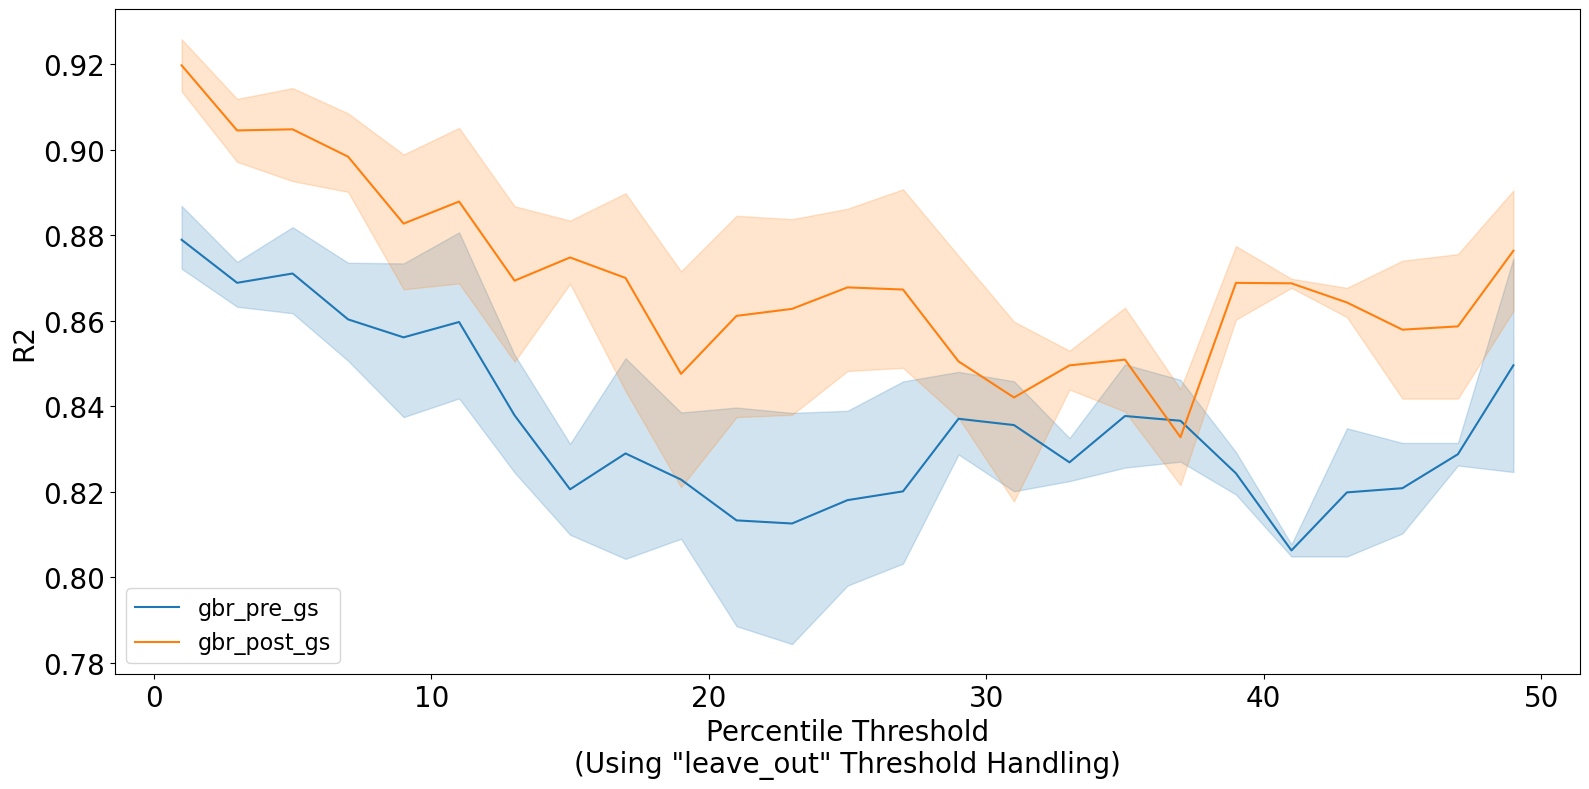

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


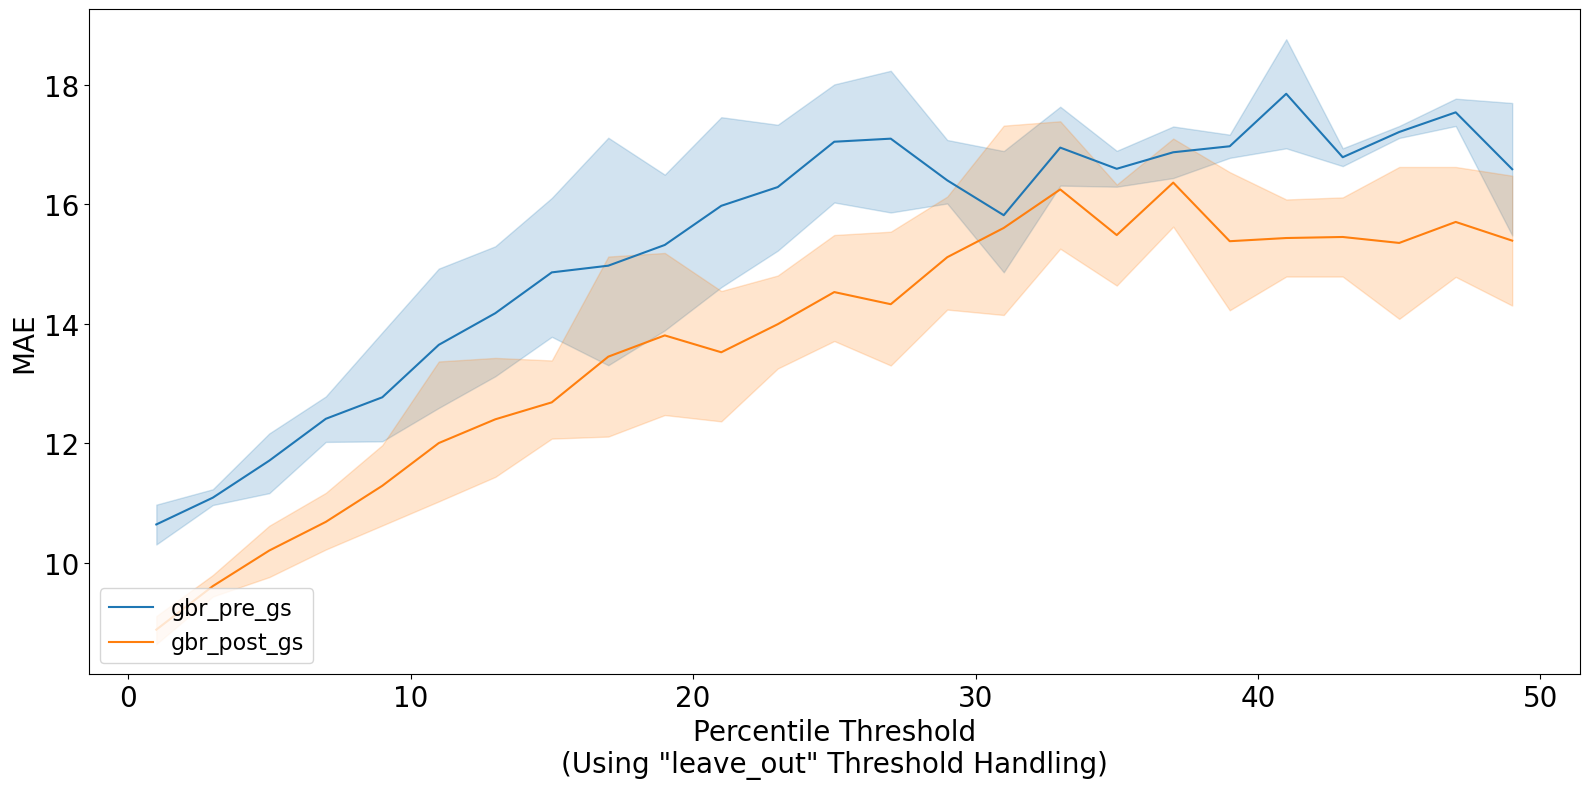

In [17]:
encoding_method='aaprop'
models_to_keep = ['gbr']
compare_phylo_cv_results('wt',encoding_method,wt_aap_pre_gs_results_df,wt_aap_post_gs_results_df,atts_of_intrst,models_to_keep=models_to_keep,max_threshold=50,relation_handeling_methods=relation_handeling_methods, suffix=suffix)

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


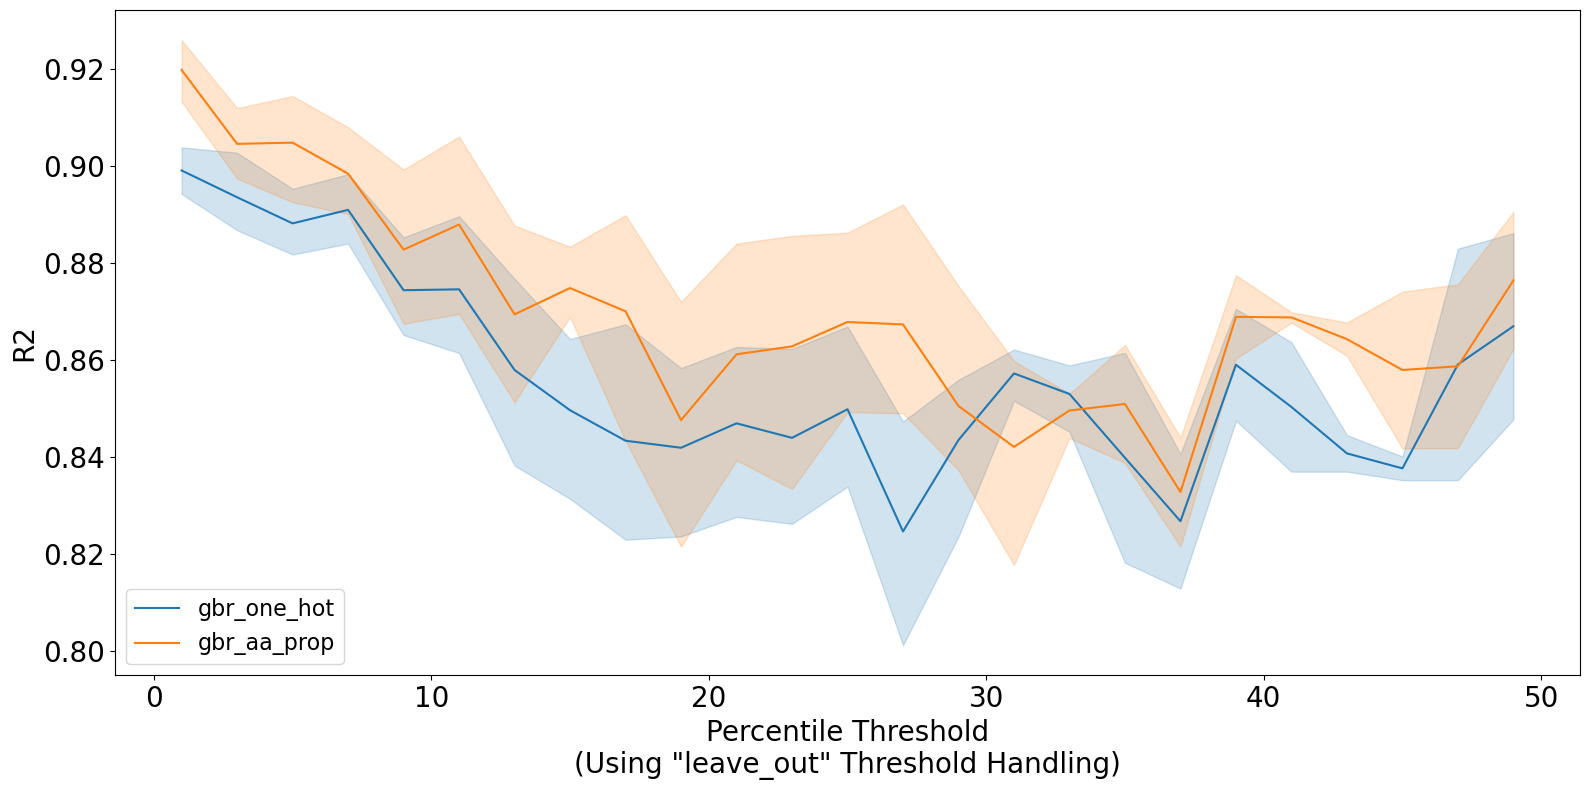

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


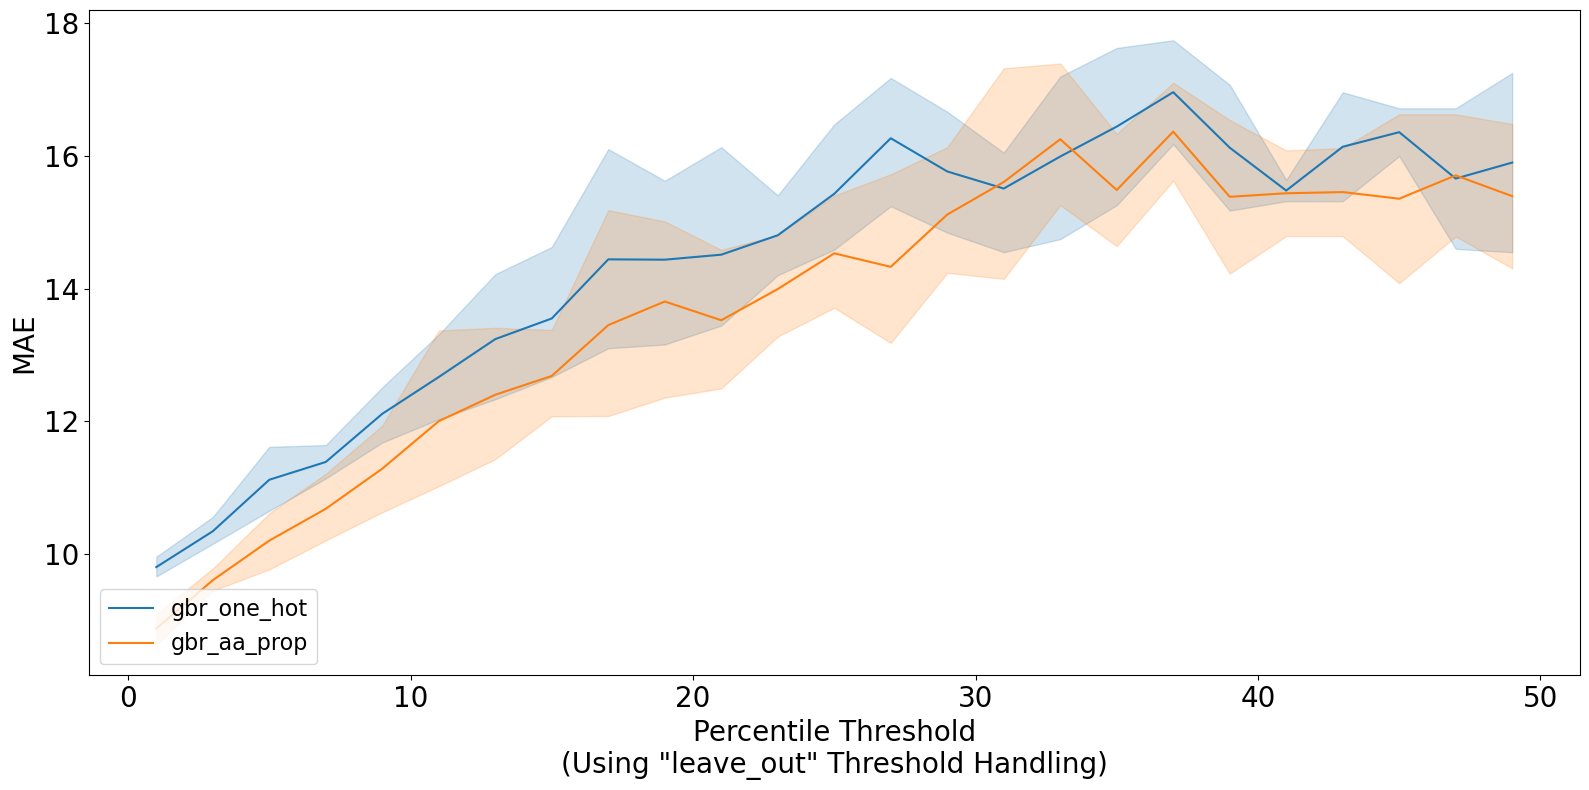

In [18]:
encoding_method='post_gs'
models_to_keep = ['gbr']
suffix=['one_hot','aa_prop']
compare_phylo_cv_results('wt',encoding_method,wt_post_gs_results_df,wt_aap_post_gs_results_df,atts_of_intrst,models_to_keep=models_to_keep,max_threshold=50,relation_handeling_methods=relation_handeling_methods, suffix=suffix)

MNM Analysis

In [19]:
wt_mnm_pre_gs_results_df = pd.read_csv(f"{report_dir}/one_hot_encoded/pre_grid_search/wt_mnm_aligned_VPOD_1.2_het_phylo_cv_2025-03-12_18-57-08/wt_mnm_aligned_VPOD_1.2_het_phylo_cv_results.csv") # Replace with your actual file name
wt_mnm_pre_gs_results_df.head()

Tree Relation_Handling  N_Folds  \
0  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
1  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
2  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
3  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
4  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   

  Model  Threshold        R2       MAE      MAPE         MSE       RMSE  
0   gbr          1  0.945446  8.609218  0.018272  177.204566  13.206213  
1    rf          1  0.935231  8.435417  0.017999  208.117131  14.184023  
2   xgb          1  0.931122  8.409098  0.017908  219.989617  14.666383  
3   gbr          3  0.937487  9.515990  0.020412  201.753946  13.962397  
4    rf          3  0.928459  9.584318  0.020811  231.938627  14.646291

In [20]:
wt_mnm_post_gs_results_df = pd.read_csv(f"{report_dir}/one_hot_encoded/post_grid_search/wt_mnm_aligned_VPOD_1.2_het_phylo_cv_2025-03-18_19-36-44/wt_mnm_aligned_VPOD_1.2_het_phylo_cv_results.csv") # Replace with your actual file name
wt_mnm_post_gs_results_df.head()

Tree Relation_Handling  N_Folds  \
0  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
1  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
2  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
3  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
4  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   

  Model  Threshold        R2       MAE      MAPE         MSE       RMSE  
0   gbr          1  0.961336  7.224693  0.015380  125.545592  10.962806  
1   xgb          1  0.953529  7.886965  0.016694  152.398089  12.249057  
2   gbr          3  0.950674  8.199233  0.017603  160.067595  12.300859  
3   xgb          3  0.942698  9.134122  0.019525  185.275958  13.407853  
4   gbr          5  0.942192  9.228886  0.019928  185.757969  13.253954

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


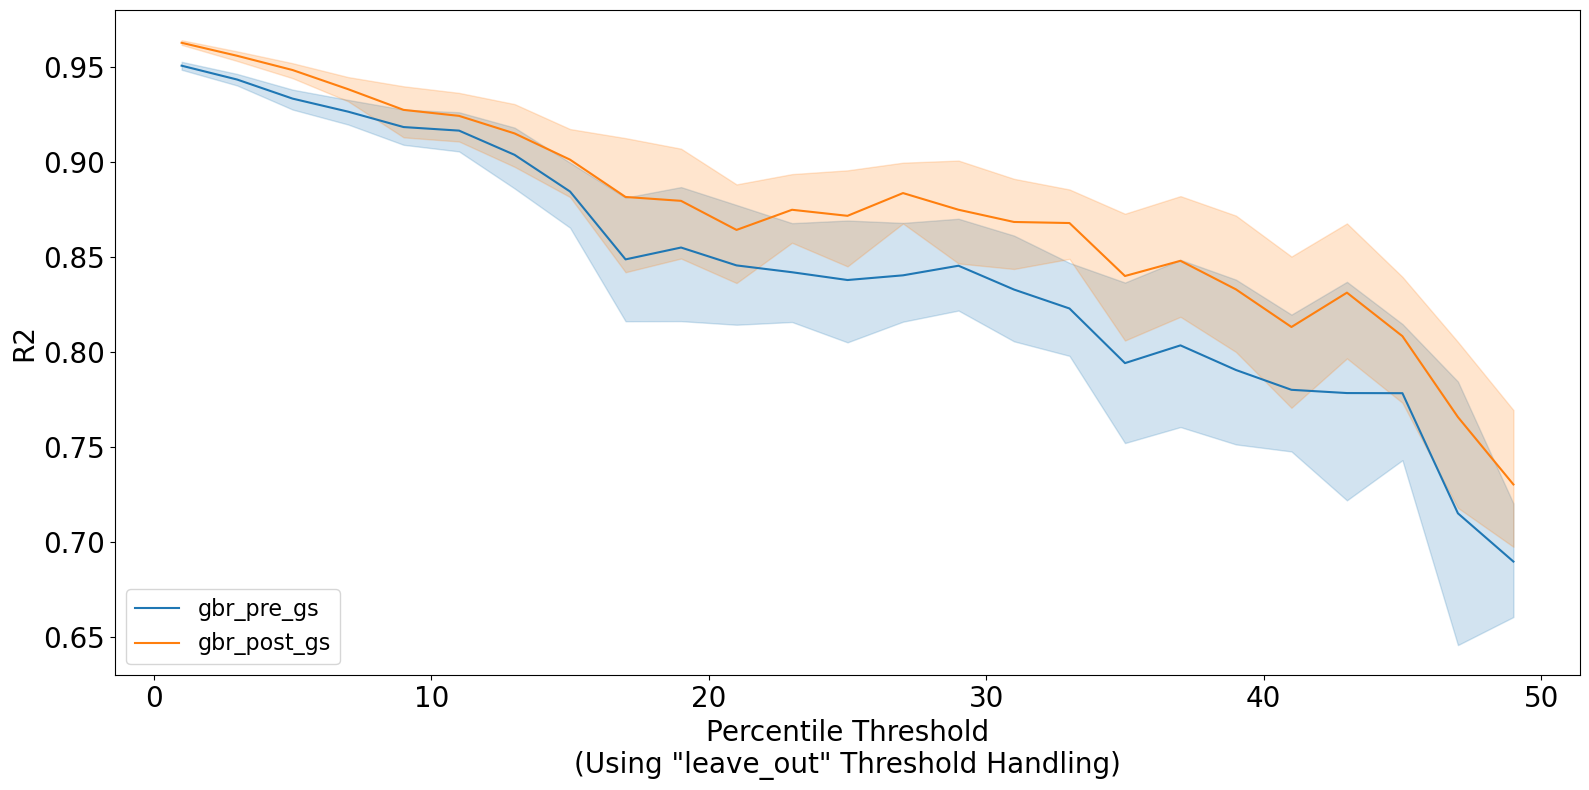

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


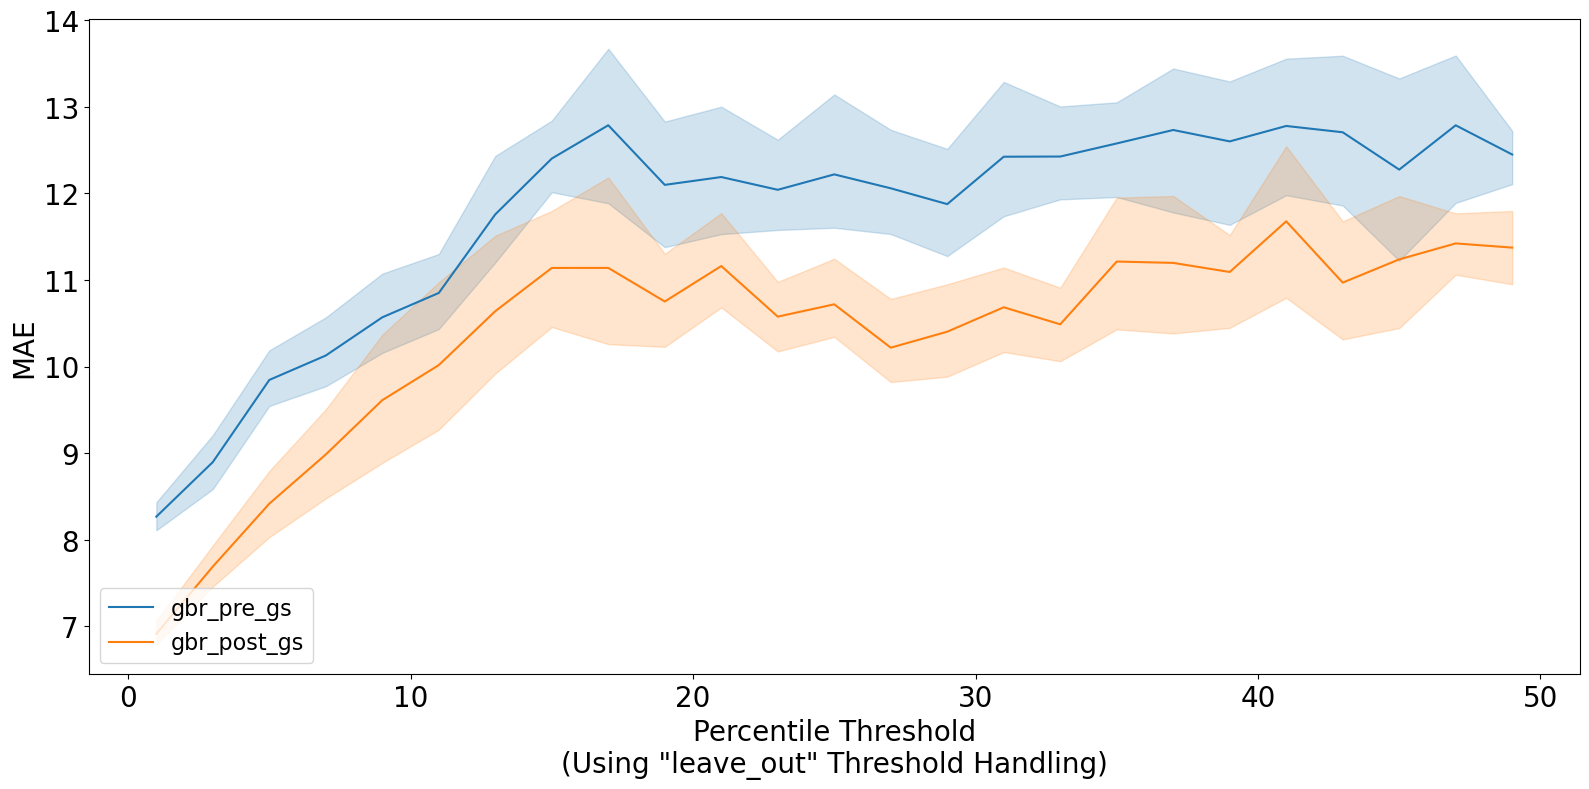

In [22]:
encoding_method='onehot'
models_to_keep = ['gbr']
suffix=['pre_gs','post_gs']
compare_phylo_cv_results('wt_mnm',encoding_method,wt_mnm_pre_gs_results_df,wt_mnm_post_gs_results_df,atts_of_intrst,models_to_keep=models_to_keep,max_threshold=50,relation_handeling_methods=relation_handeling_methods, suffix=suffix)

In [23]:
wt_mnm_aap_pre_gs_results_df = pd.read_csv(f"{report_dir}/aa_prop_encoded/pre_grid_search/wt_mnm_aligned_VPOD_1.2_het_phylo_cv_2025-04-16_14-57-51/wt_mnm_aligned_VPOD_1.2_het_phylo_cv_results.csv") # Replace with your actual file name
wt_mnm_aap_pre_gs_results_df.head()

Tree Relation_Handling  N_Folds  \
0  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
1  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
2  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
3  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
4  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   

  Model  Threshold        R2       MAE      MAPE         MSE       RMSE  
0    rf          1  0.951543  7.912759  0.016713  157.339999  12.350894  
1   gbr          1  0.949531  8.193886  0.017256  164.692559  12.782965  
2   xgb          1  0.941500  8.195046  0.017465  191.207584  13.674263  
3   gbr          3  0.945058  8.965848  0.019083  177.415336  13.062927  
4    rf          3  0.938544  9.340128  0.020029  198.185586  13.791368

In [24]:
wt_mnm_aap_post_gs_results_df = pd.read_csv(f"{report_dir}/aa_prop_encoded/post_grid_search/wt_mnm_aligned_VPOD_1.2_het_phylo_cv_2025-04-16_19-45-55/wt_mnm_aligned_VPOD_1.2_het_phylo_cv_results.csv") # Replace with your actual file name
wt_mnm_aap_post_gs_results_df.head()

Tree Relation_Handling  N_Folds  \
0  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
1  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
2  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
3  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   
4  wt_mnm_aligned_VPOD_1.2_het.fasta.treefile         leave_out        5   

  Model  Threshold        R2        MAE      MAPE         MSE       RMSE  
0   gbr          1  0.959580   7.308885  0.015394  132.970174  11.429033  
1   gbr          3  0.947543   8.196066  0.017418  169.815991  12.669747  
2   gbr          5  0.936279   9.178208  0.019747  202.685453  13.594899  
3   gbr          7  0.937472   8.915577  0.019163  191.419351  13.321122  
4   gbr          9  0.912816  10.356915  0.022085  255.355340  15.477940

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


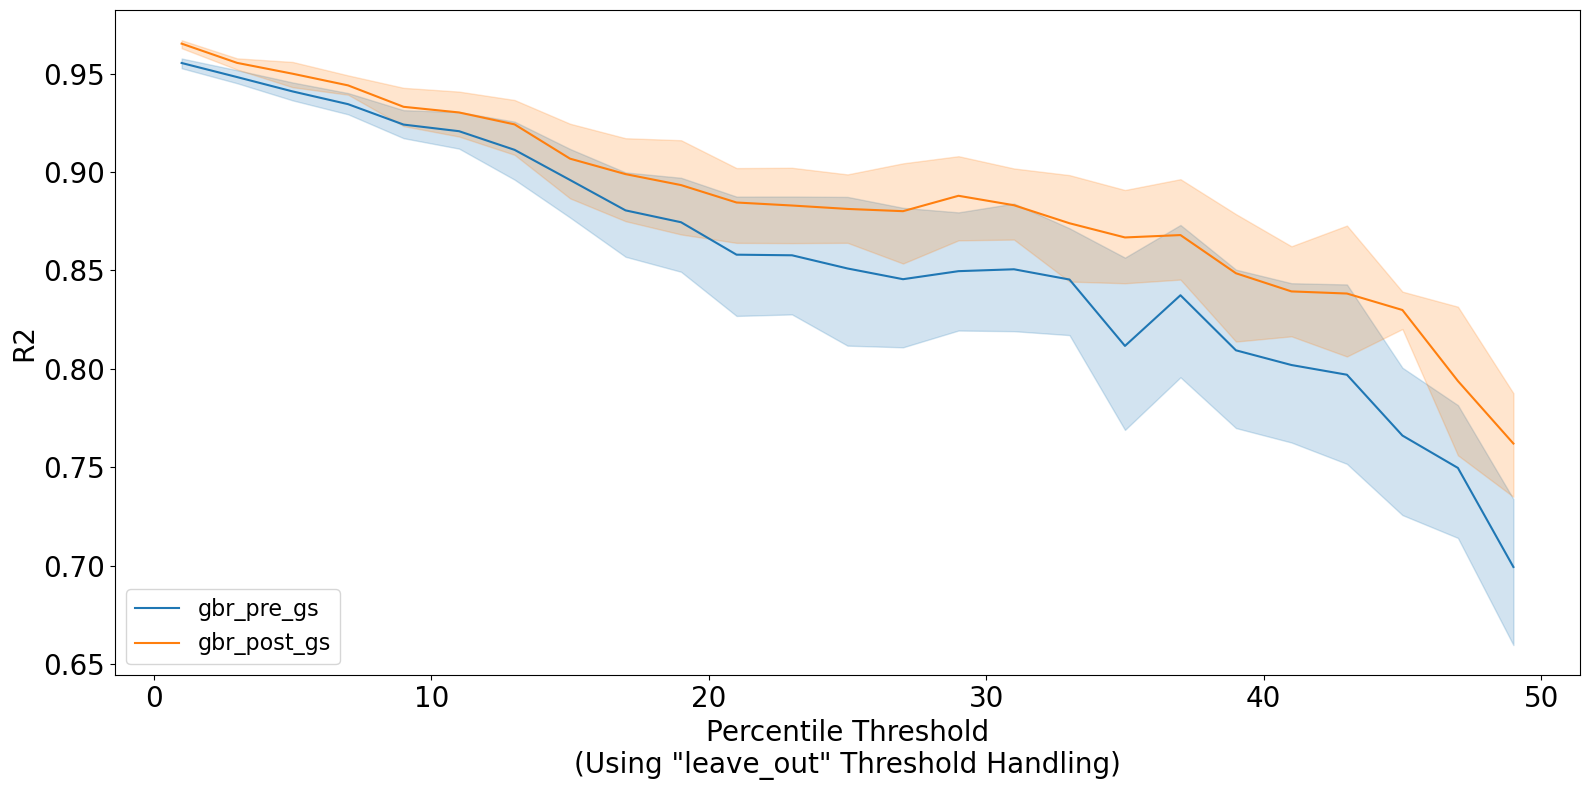

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


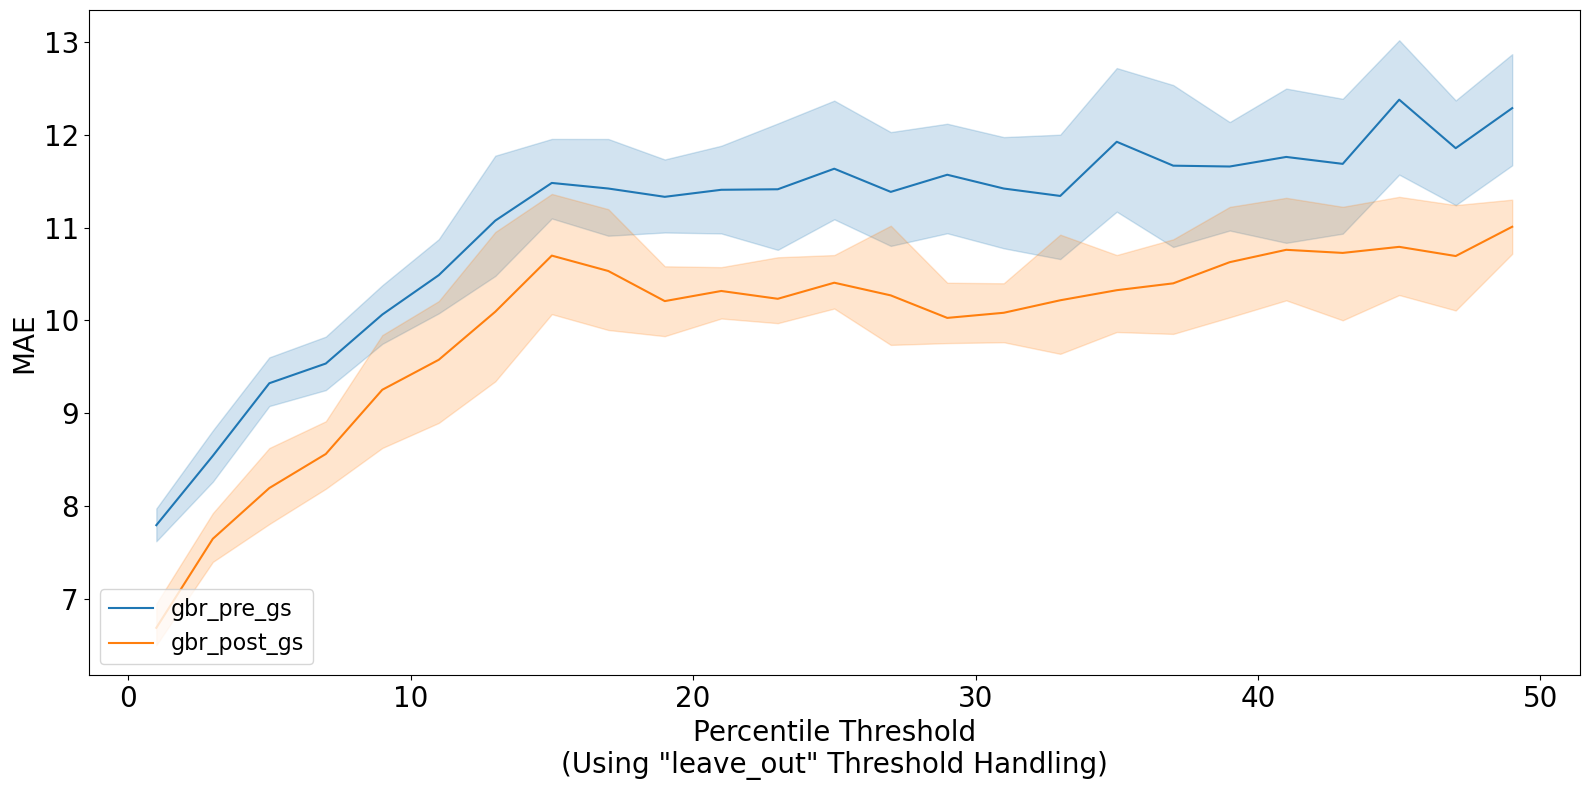

In [26]:
encoding_method='aaprop'
models_to_keep = ['gbr']
compare_phylo_cv_results('wt_mnm',encoding_method,wt_mnm_aap_pre_gs_results_df,wt_mnm_aap_post_gs_results_df,atts_of_intrst,models_to_keep=models_to_keep,max_threshold=50,relation_handeling_methods=relation_handeling_methods, suffix=suffix)

aa_prop vs. one-hot mnm

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


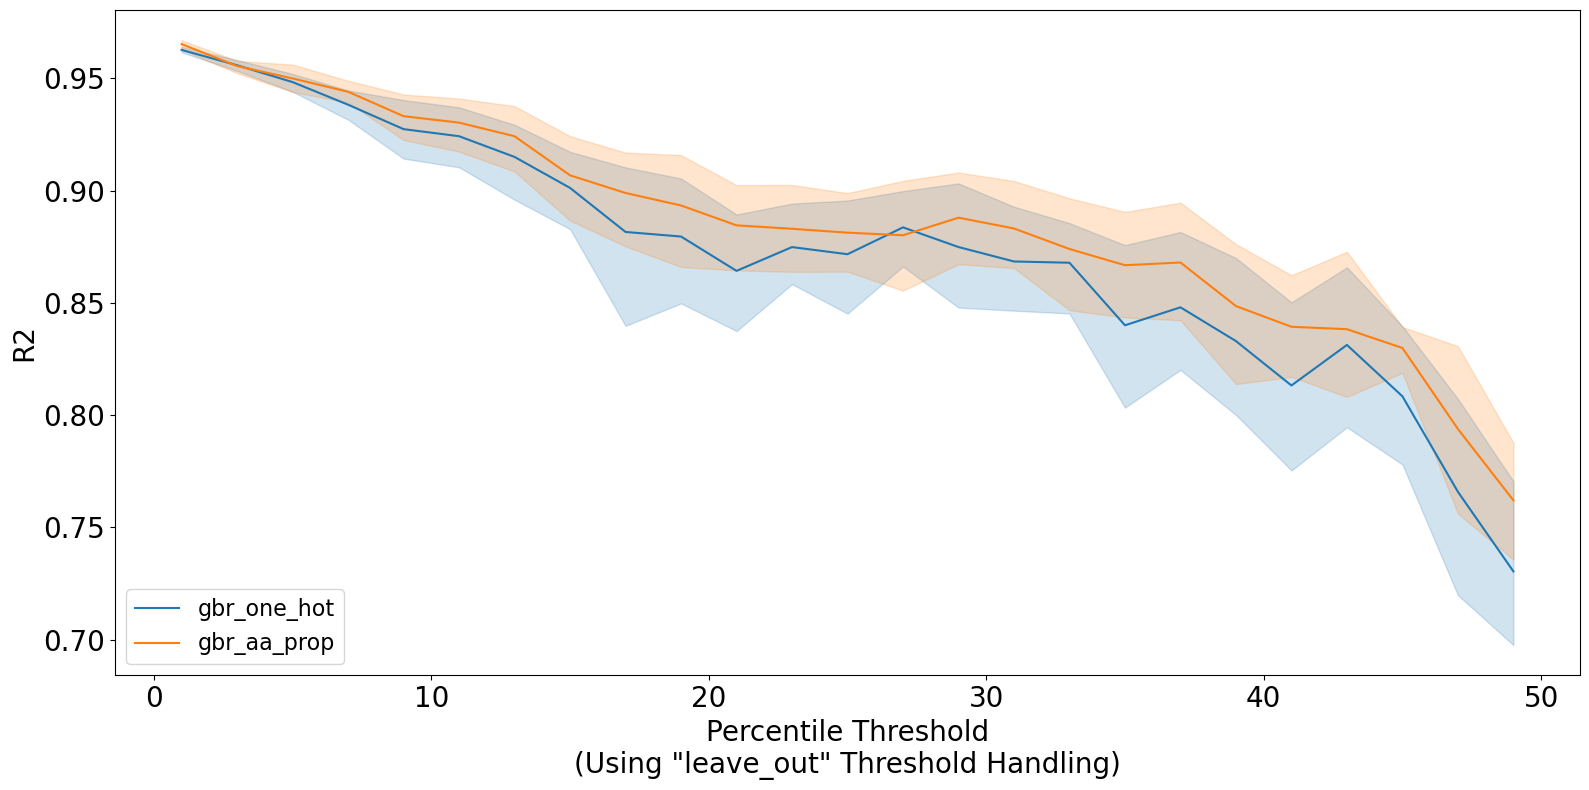

C:\Users\safra\AppData\Local\Temp\ipykernel_33444\1798443507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_att['Model'] = model_att['Model'] + '_' + suffix1


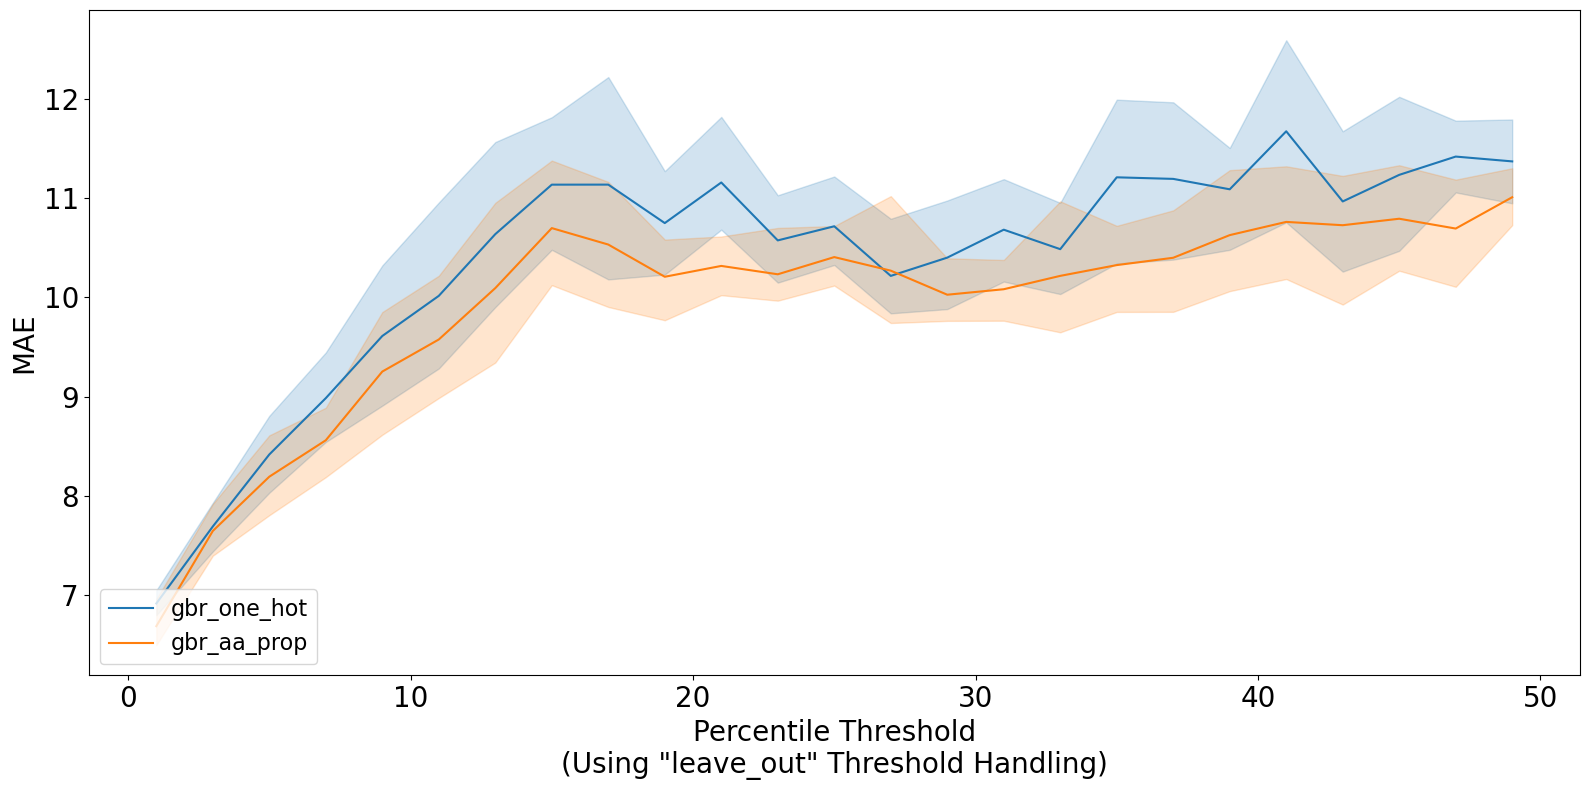

In [28]:
encoding_method='post_gs'
models_to_keep = ['gbr']
suffix=['one_hot','aa_prop']
compare_phylo_cv_results('wt_mnm',encoding_method,wt_mnm_post_gs_results_df,wt_mnm_aap_post_gs_results_df,atts_of_intrst,models_to_keep=models_to_keep,max_threshold=50,relation_handeling_methods=relation_handeling_methods, suffix=suffix)

mnm vs. het

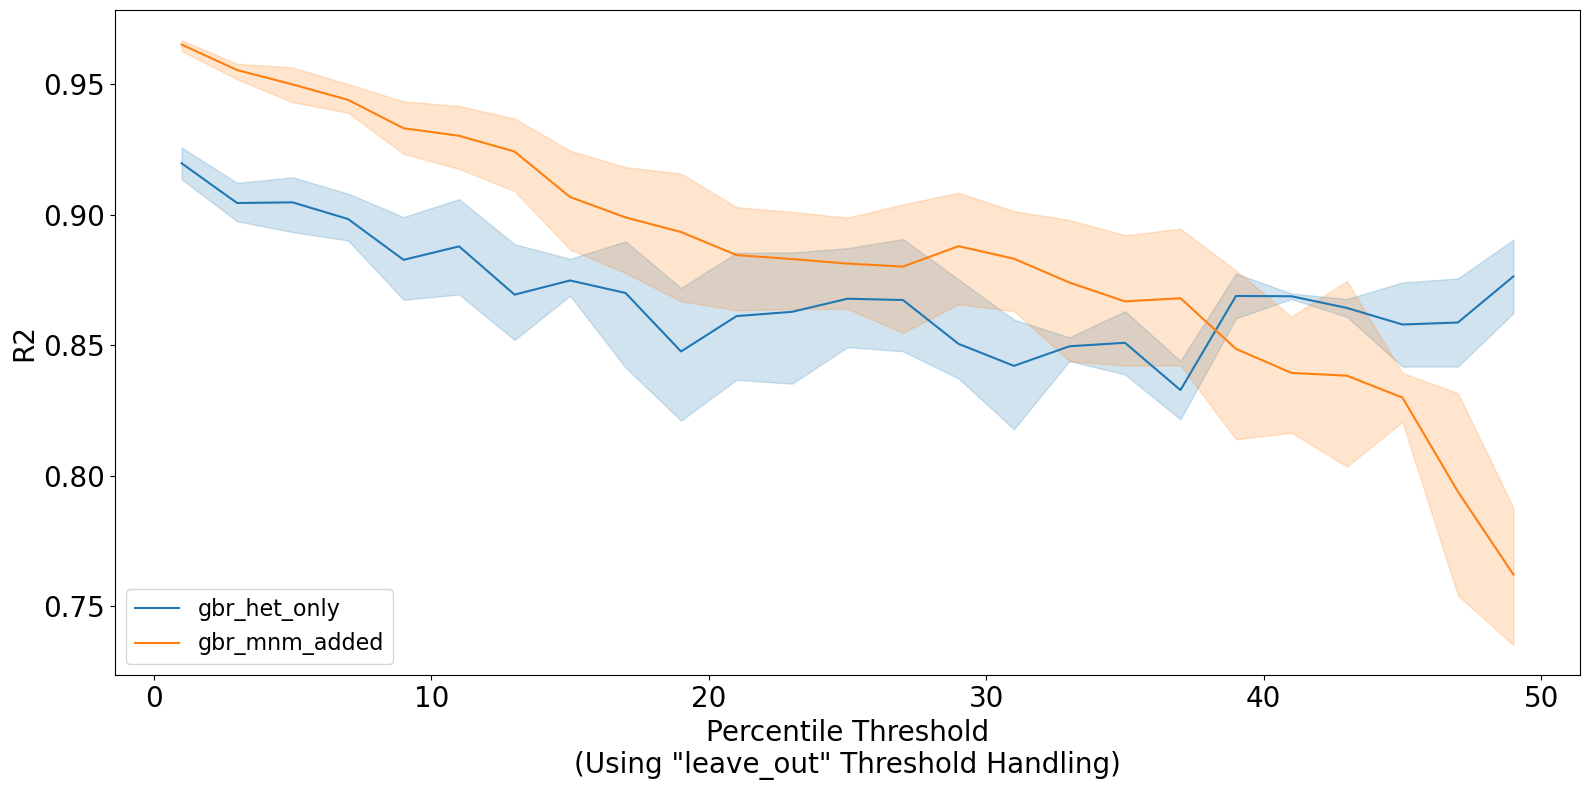

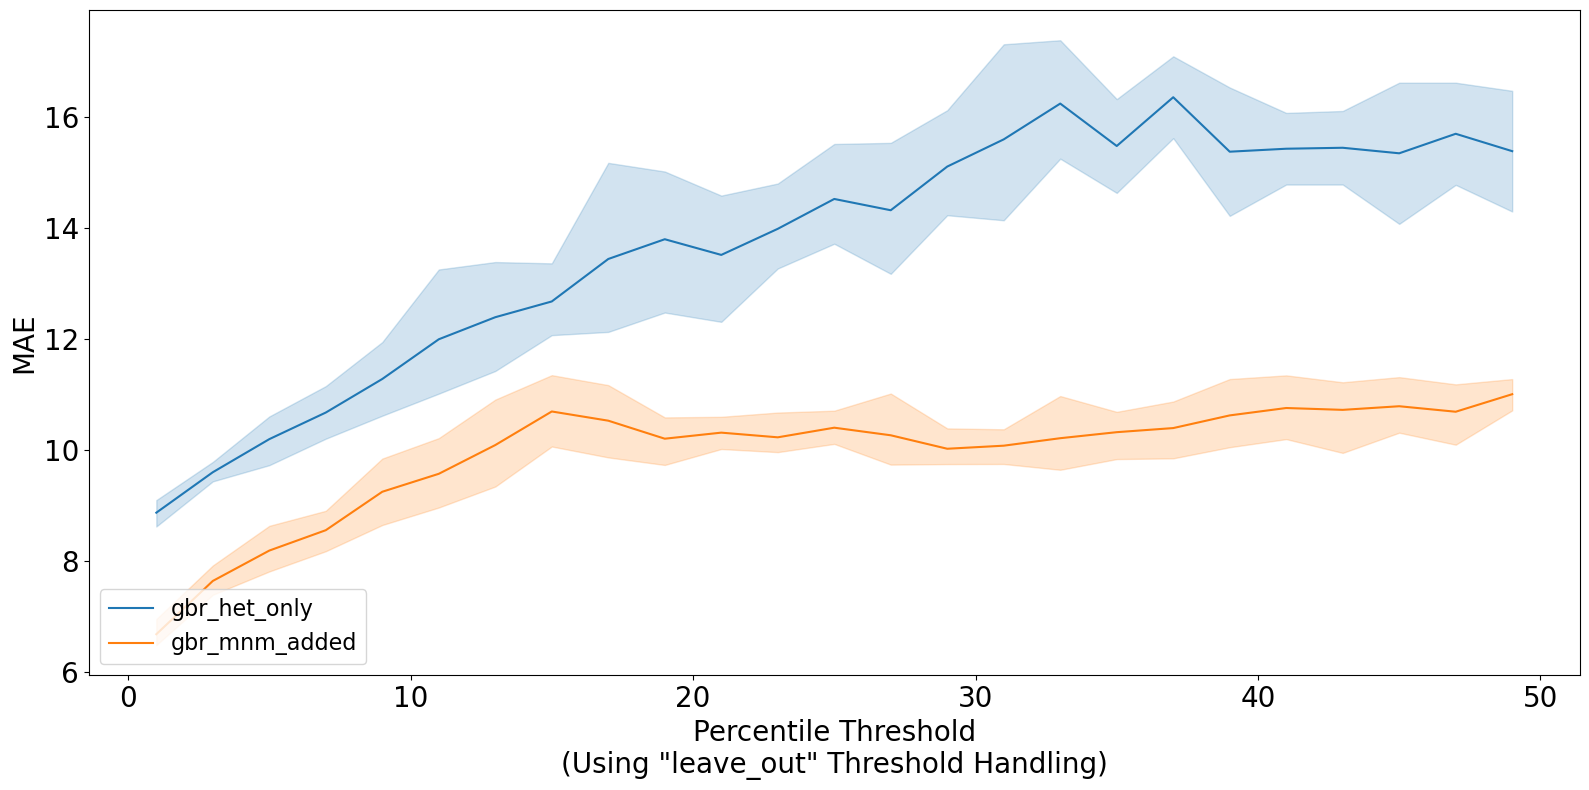

In [30]:
encoding_method='aaprop'
models_to_keep = ['gbr']
suffix=['het_only','mnm_added']
compare_phylo_cv_results('wt',encoding_method,wt_aap_post_gs_results_df,wt_mnm_aap_post_gs_results_df,atts_of_intrst,models_to_keep=models_to_keep,max_threshold=50,relation_handeling_methods=relation_handeling_methods, suffix=suffix)